In [14]:
import pandas as pd
import numpy as np


In [36]:
np.random.seed(42)

data_sayisi = 1000

data = {
    'EmployeeID': range(1, data_sayisi + 1),
    'Age': np.random.randint(22, 60, size=data_sayisi),
    'Gender': np.random.choice(['Male', 'Female'], size=data_sayisi),
    'JobRole': np.random.choice([
        'Sales Representative', 
        'Research Scientist', 
        'Manager', 
        'Software Engineer', 
        'HR Specialist'
    ], size=data_sayisi),
    'MonthlyIncome': np.random.randint(3000, 15000, size=data_sayisi),
    'YearsAtCompany': np.random.randint(0, 20, size=data_sayisi),
    'WorkLifeBalance': np.random.choice([1, 2, 3, 4], size=data_sayisi),
    'PerformanceRating': np.random.choice([1, 2, 3, 4], size=data_sayisi),
    'DistanceFromHome': np.random.randint(1, 50, size=data_sayisi)
}

df = pd.DataFrame(data)

df['Attrition'] = np.random.choice([0, 1], size=data_sayisi, p=[0.7, 0.3])

print(df.head())
print("\nDATASET SUMMARY:")
print(df.info())

   EmployeeID  Age  Gender             JobRole  MonthlyIncome  YearsAtCompany  \
0           1   50  Female   Software Engineer           5504               8   
1           2   36    Male  Research Scientist          13964               4   
2           3   29    Male  Research Scientist          12346               9   
3           4   42    Male   Software Engineer           3587               3   
4           5   40    Male  Research Scientist          13013               4   

   WorkLifeBalance  PerformanceRating  DistanceFromHome  Attrition  
0                1                  3                44          0  
1                2                  2                23          1  
2                1                  2                41          0  
3                4                  2                11          0  
4                3                  3                42          0  

DATASET SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data col

In [37]:
labels = ['High Performer', 'Medium Performer', 'Low Performer', 'At Risk']
data['EmployeeCategory'] = np.random.choice(labels, size=data_sayisi, p=[0.3, 0.3, 0.2, 0.2])

df = pd.DataFrame(data)

print(df['EmployeeCategory'].value_counts())
print(df.head())

EmployeeCategory
Medium Performer    301
High Performer      285
Low Performer       216
At Risk             198
Name: count, dtype: int64
   EmployeeID  Age  Gender             JobRole  MonthlyIncome  YearsAtCompany  \
0           1   50  Female   Software Engineer           5504               8   
1           2   36    Male  Research Scientist          13964               4   
2           3   29    Male  Research Scientist          12346               9   
3           4   42    Male   Software Engineer           3587               3   
4           5   40    Male  Research Scientist          13013               4   

   WorkLifeBalance  PerformanceRating  DistanceFromHome  EmployeeCategory  
0                1                  3                44    High Performer  
1                2                  2                23  Medium Performer  
2                1                  2                41  Medium Performer  
3                4                  2                11    High Perfor

In [38]:
df = pd.DataFrame(data)

df

,EmployeeID,Age,Gender,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,PerformanceRating,DistanceFromHome,EmployeeCategory
0,1,50,Female,Software Engineer,5504,8,1,3,44,High Performer
1,2,36,Male,Research Scientist,13964,4,2,2,23,Medium Performer
2,3,29,Male,Research Scientist,12346,9,1,2,41,Medium Performer
3,4,42,Male,Software Engineer,3587,3,4,2,11,High Performer
4,5,40,Male,Research Scientist,13013,4,3,3,42,Low Performer
...,...,...,...,...,...,...,...,...,...,...
995,996,34,Female,Sales Representative,13993,17,1,1,28,Medium Performer
996,997,51,Female,Manager,8973,13,3,3,16,Low Performer
997,998,44,Male,Research Scientist,9236,17,3,4,46,High Performer
998,999,40,Female,Software Engineer,11277,12,1,2,23,High Performer


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [40]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  
df['EmployeeCategory'] = LabelEncoder().fit_transform(df['EmployeeCategory']) 

df

,EmployeeID,Age,Gender,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,PerformanceRating,DistanceFromHome,EmployeeCategory
0,1,50,0,Software Engineer,5504,8,1,3,44,1
1,2,36,1,Research Scientist,13964,4,2,2,23,3
2,3,29,1,Research Scientist,12346,9,1,2,41,3
3,4,42,1,Software Engineer,3587,3,4,2,11,1
4,5,40,1,Research Scientist,13013,4,3,3,42,2
...,...,...,...,...,...,...,...,...,...,...
995,996,34,0,Sales Representative,13993,17,1,1,28,3
996,997,51,0,Manager,8973,13,3,3,16,2
997,998,44,1,Research Scientist,9236,17,3,4,46,1
998,999,40,0,Software Engineer,11277,12,1,2,23,1


In [41]:
X = df[['Age', 'Gender', 'JobRole', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance', 'PerformanceRating', 'DistanceFromHome']]
y = df['EmployeeCategory']

In [42]:
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,Age,Gender,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,PerformanceRating,DistanceFromHome
716,57,1,Research Scientist,13863,15,3,4,40
351,44,1,Sales Representative,6134,2,2,1,43
936,33,1,Software Engineer,13541,3,4,1,36
256,43,1,Sales Representative,12324,14,1,3,22
635,24,1,Software Engineer,8409,3,2,1,21
...,...,...,...,...,...,...,...,...
106,26,1,HR Specialist,13412,4,2,4,22
270,40,0,Software Engineer,3726,7,1,3,26
860,47,1,HR Specialist,14767,7,2,1,39
435,57,1,Research Scientist,12493,0,4,3,7


In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

ValueError: could not convert string to float: 'Research Scientist'

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
categorical_columns = ['Gender', 'JobRole']
numeric_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'PerformanceRating']
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_columns),
('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) ])

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


scaler = StandardScaler()
X = df[numeric_columns + categorical_columns]
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df['EmployeeCategory'],  test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [50]:
example_customer_info = [[35, 1, 200, 1, 100, 2]]
example_customer_info = scaler.transform(example_customer_info)

tahmin = log_reg.predict(example_customer_info)
tahmin

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [51]:
X_test_df

,Age,Gender,JobRole,MonthlyIncome,YearsAtCompany,WorkLifeBalance,PerformanceRating,DistanceFromHome
521,24,0,HR Specialist,9642,0,3,4,30
737,36,1,Manager,8832,9,3,4,9
740,49,1,Research Scientist,4316,18,1,3,37
660,45,0,HR Specialist,8565,17,1,2,29
411,33,0,Manager,9268,17,4,2,26
...,...,...,...,...,...,...,...,...
436,46,0,HR Specialist,14332,5,3,2,46
764,58,0,Manager,7424,17,3,2,26
88,30,0,Sales Representative,11787,2,3,4,39
63,42,1,HR Specialist,3459,18,4,4,2


In [52]:
y_test.to_list()

[1,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 2,
 0,
 3,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 3,
 2,
 1,
 0,
 3,
 1,
 0,
 1,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 1,
 0,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 3,
 3,
 2,
 0,
 0,
 2,
 3,
 3,
 1,
 2,
 0,
 3,
 0,
 2,
 2,
 2,
 1,
 3,
 3,
 2,
 0,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 3,
 3,
 2,
 3,
 0,
 3,
 1,
 1,
 2,
 2,
 1]

In [54]:
y_pred_log_reg = log_reg.predict(X_train)
y_pred_log_reg

array([3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 0, 3,
       3, 1, 1, 3, 0, 3, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       3, 0, 3, 0, 0, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 3, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 3, 1, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       2, 1, 1, 3, 0, 3, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 1,
       0, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 1, 1, 0, 3, 3, 3, 3, 1, 3, 0, 3,
       1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1, 1,
       3, 1, 0, 1, 3, 3, 3, 1, 1, 3, 1, 0, 1, 1, 3, 3, 0, 3, 1, 3, 3, 3,
       3, 1, 3, 0, 1, 1, 3, 0, 3, 1, 3, 3, 3, 1, 3,

In [55]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

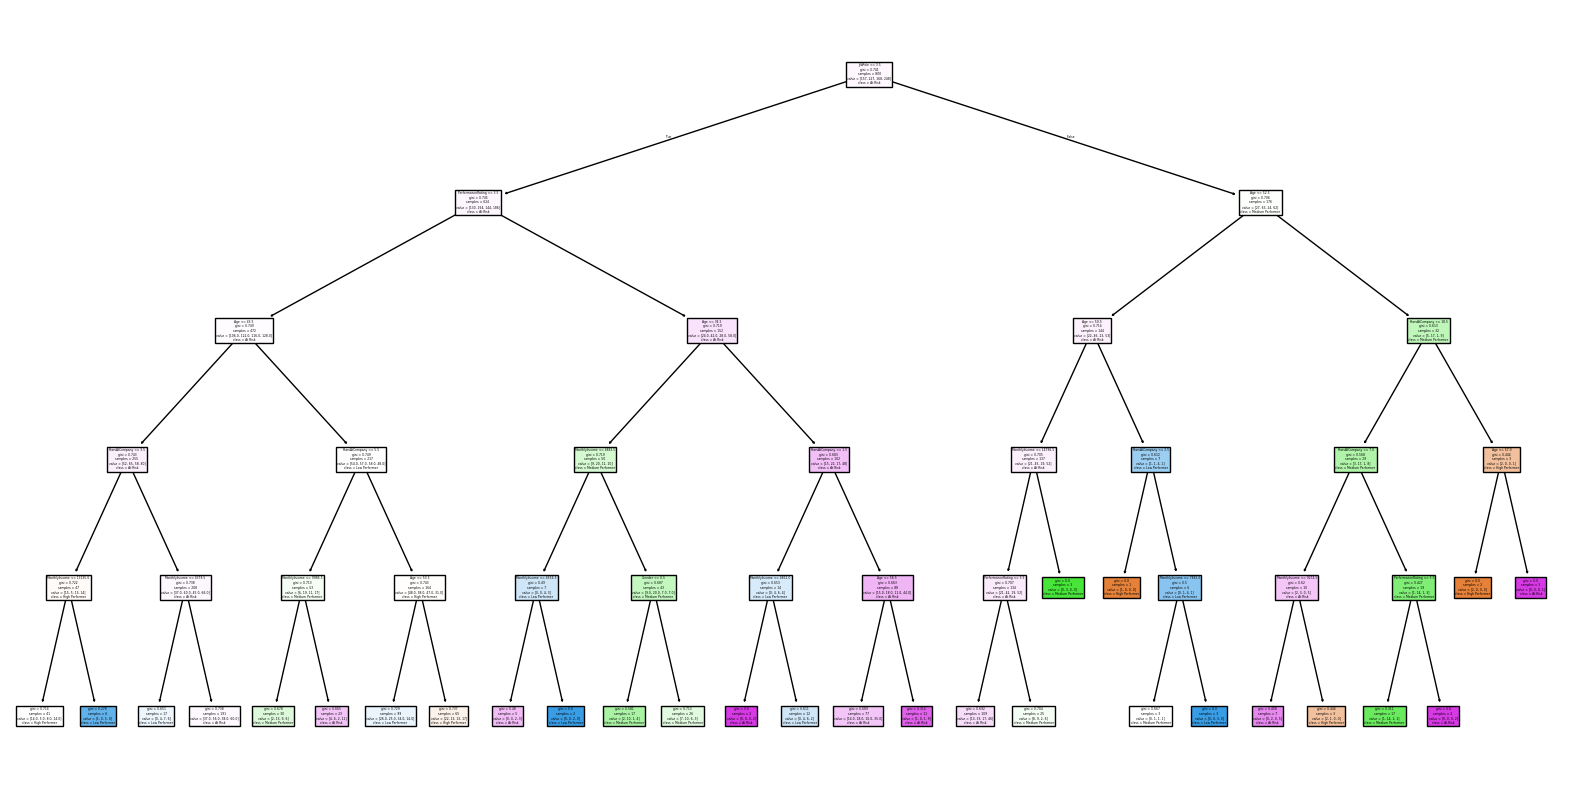

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=labels)
plt.show()

In [57]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree

array([1, 3, 2, 2, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2,
       0, 1, 3, 2, 0, 1, 1, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 1, 0, 3, 3, 2,
       2, 3, 1, 0, 3, 3, 0, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 0, 0, 1, 3, 2,
       3, 3, 3, 3, 1, 0, 0, 3, 1, 3, 1, 0, 1, 0, 2, 2, 1, 3, 0, 2, 3, 0,
       3, 1, 0, 1, 0, 3, 1, 3, 0, 1, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 2, 3, 2, 3, 3, 1,
       2, 3, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 0, 3, 3, 2, 3, 0, 2, 2,
       3, 1, 1, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 0, 3,
       3, 2, 3, 0, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3, 0, 0, 1,
       0, 3])

In [58]:
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [200, 800]

In [59]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("y_test shape:", y_test.shape)
print("y_pred_log_reg shape:", y_pred_log_reg.shape)

y_test shape: (200,)
y_pred_log_reg shape: (200,)


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     df[numeric_columns + categorical_columns], 
    df['EmployeeCategory'], test_size=0.2, random_state=42)

In [61]:
assert len(y_test) == len(y_pred_log_reg), "Boyutlar eşit değil"

In [62]:
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

('              precision    recall  f1-score   support\n\n           0       0.29      0.12      0.17        41\n           1       0.23      0.22      0.23        58\n           2       0.50      0.02      0.04        48\n           3       0.26      0.60      0.36        53\n\n    accuracy                           0.26       200\n   macro avg       0.32      0.24      0.20       200\nweighted avg       0.31      0.26      0.21       200\n',
 0.255,
 '              precision    recall  f1-score   support\n\n           0       0.19      0.15      0.16        41\n           1       0.16      0.10      0.13        58\n           2       0.23      0.15      0.18        48\n           3       0.31      0.58      0.40        53\n\n    accuracy                           0.25       200\n   macro avg       0.22      0.25      0.22       200\nweighted avg       0.22      0.25      0.22       200\n',
 0.25)

In [63]:
print('Logistic Regression Model:')
print(log_reg_report)
print('Accuracy:', log_reg_accuracy)
print('Decision Tree Model:')
print(tree_report)
print('Accuracy:', tree_accuracy)

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        41
           1       0.23      0.22      0.23        58
           2       0.50      0.02      0.04        48
           3       0.26      0.60      0.36        53

    accuracy                           0.26       200
   macro avg       0.32      0.24      0.20       200
weighted avg       0.31      0.26      0.21       200

Accuracy: 0.255
Decision Tree Model:
              precision    recall  f1-score   support

           0       0.19      0.15      0.16        41
           1       0.16      0.10      0.13        58
           2       0.23      0.15      0.18        48
           3       0.31      0.58      0.40        53

    accuracy                           0.25       200
   macro avg       0.22      0.25      0.22       200
weighted avg       0.22      0.25      0.22       200

Accuracy: 0.25


In [65]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


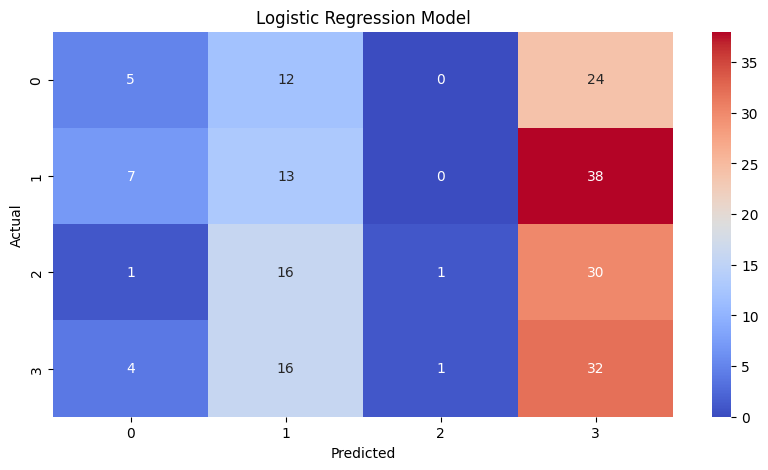

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted']), 
            annot=True, fmt='d',
            cmap='coolwarm')
plt.title('Logistic Regression Model')
plt.show()

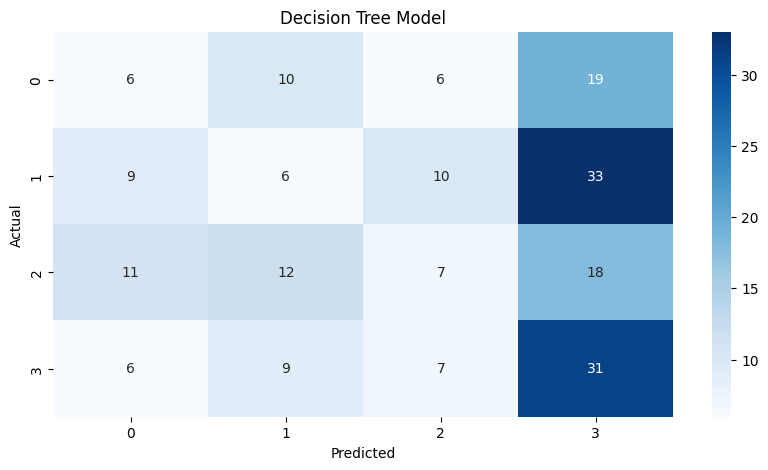

In [67]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap= 'Blues')
plt.title('Decision Tree Model')
plt.show()